In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as fmr
import FMR_Evaluator_v210331 as eva

import corporate_design_colors_v3 as cpd

from scipy.optimize import curve_fit

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

#help(fmr)

no style found


# CPW8

In [2]:
dataset='BF CPW8 100mK lowbw'
data_CPW8=fmr.read(dataset,loc='../../../messungen/')

100%|██████████| 2601/2601 [01:54<00:00, 22.64it/s]


with temped and boxxed preamplifier (25°C)


In [ ]:
dataset='BF Cobulky32nm LONG'
data_Cobulky32nm=fmr.read(dataset,loc='../../../messungen/')

 22%|██▏       | 1159/5201 [00:17<00:47, 84.99it/s]

In [ ]:
data_CPW8, data_Cobulky32nm

### Data Threadment

In [ ]:
d=data_CPW8
db=eva.complex_binning(d, Hmin=0, Hmax=1.1, NH=1101)
#db=eva.complex_binning(d)
#H=np.linspace(0,1.1,1101)
T_RT=np.flip(d['T_RT(H)'])
dig=np.digitize(d['H'],db['H'][:-1])
T=np.zeros(np.shape(db['H']))
counter=np.zeros(np.shape(db['H']))
for i, di in enumerate(dig):
    T[di]=T[di]+T_RT[i]
    counter[di]=counter[di]+1
T=T/counter
for i in range(len(T)):
    if np.isnan(T[i]):
        T[i]=T[i-1]
T[0:-3]=T[2:-1]
T[0]=T[1]
T

In [ ]:
dn=eva.normS21(db, Hnorm=[1.1])

### Show normal Dataset

In [ ]:
img=20*np.log10(np.abs(dn['S21']))
norm=20*np.log10(np.abs(dn['S21norm']))
posN=dn['Hnorm']
H=dn['H']
freq=dn['f']

Hlim=(-.1,1.5)
flim=(0,40)
contrast=0.15
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(0\,$T$)$ [dB]'
clabel='$T_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))

In [ ]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)
plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves()(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()
ax_norm.set_xticks([0,-35])

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
#ax_img.vlines(posN, ymin=ext[2], ymax=ext[3],
#              color=cpd.curves()(1))
#ax_img.text(0+.02,3,'$0\,$T',
#              color=cpd.curves()(1))

#ax_img.set_xticks(np.linspace(-.1,.5,7))

fig.colorbar(im,label=clabel, cax=ax_clb)
#ax_img.plot(H,28.2*H+8)

ax_img.plot(H,H*28.025,
         c=cpd.curves(color='magenta')(0),lw=1)
ax_img.set_ylim([ext[2],ext[3]])
#fig.execute_constrained_layout()
#fig.savefig('small_signal.pgf')

## Crazy Auswahlregeln

In [ ]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

d=data_CPW8
db=eva.complex_binning(d, Hmin=0, Hmax=1, NH=201, fmin=5)
dn=eva.normS21(db, Hnorm=[1])
freq=dn['f']
H=dn['H']

T_RT=np.flip(d['T_RT(H)'])
dig=np.digitize(d['H'],db['H'][:-1])
T=np.zeros(np.shape(db['H']))
counter=np.zeros(np.shape(db['H']))
for i, di in enumerate(dig):
    T[di]=T[di]+T_RT[i]
    counter[di]=counter[di]+1
T=T/counter
for i in range(len(T)):
    if np.isnan(T[i]):
        T[i]=T[i-1]
T[0]=T[1]

T21=20*np.log10(np.abs(dn['S21']))
Te=T
Te=Te-np.nanmin(Te)
Te=Te/np.nanmax(Te)
for i, eff in enumerate(freq):
    vec=T21[i,:]
    vec=vec-np.nanmin(vec)
    vec=vec/np.nanmax(vec)
    T21[i,:]=vec+Te
    
medianT21=np.nanmedian(T21,axis=0)
medianT21f=medianT21
nnorm,ones=np.meshgrid(medianT21,np.zeros(np.shape(T21)[0]))
bild=T21-nnorm

medianT21=np.median(bild,axis=1)
medianT21H=medianT21
ones,nnorm=np.meshgrid(np.zeros(np.shape(T21)[1]),medianT21)
bild=bild-nnorm
# ignore stuff from cavity
#mask_cavity=np.ones(np.shape(bild))
#for i,eff in enumerate(freq):
#    for j,h in enumerate(H):
#        if 16<eff<18:
#            mask_cavity[i,j]=2
#bild=bild*mask_cavity

constructed_set={'T21':bild,
                 'H':H,
                 'f':freq}
binned_data=eva.binning(constructed_set, Nf=141)

bild=binned_data['T21']
freq=binned_data['f']
H=binned_data['H']

# ignore stuff from cavity
mask_img=np.ones(np.shape(bild))
masker=np.nan
for i,eff in enumerate(freq):
    for j,h in enumerate(H):
        if ((eff-7)<((h-.2)*28)) or ((eff-20)>((h)*28)):# or h>1:
            mask_img[i,j]=masker
        if (16<eff<18) or (eff<6) or (h<.005) or (24<eff<27):# or h>.9:
            mask_img[i,j]=masker
        
bilder=bild*mask_img


minf=np.zeros(np.shape(H))
for i, h in enumerate(H):
    pos=np.argmin(np.abs(bild[:,i]-np.nanmin(bilder[:,i])))
    minf[i]=freq[pos]
minH=np.zeros(np.shape(freq))
for i, eff in enumerate(freq):
    pos=np.argmin(np.abs(bild[i,:]-np.nanmin(bilder[i,:])))
    minH[i]=H[pos]
    
#bild=bild*mask_cavity
    
maskf=np.ones(np.shape(minf))
#for i,eff in enumerate(minf):
#        if 16<eff<18:
#            maskf[i]=0
maskf=np.array(maskf,dtype=bool)
maskH=np.ones(np.shape(minH))
#for j,h in enumerate(minH):
#    if h<.12:
#        maskH[j]=0
maskH=np.array(maskH,dtype=bool)
    
miniH=np.concatenate((minH,H))
minif=np.concatenate((freq,minf))
mask=np.concatenate((maskH,maskf))

#for i,eff in enumerate(minif):
#    if eff<10:
#        mask[i]=False
for j,h in enumerate(miniH):
    if h<0.005 or h>1:
        mask[j]=False
    if ((minif[j]-7.25)<((h-.2)*28)) or ((minif[j]-19.75)>((h)*28)):
        mask[j]=False
        
for i,eff in enumerate(freq):
    for j,h in enumerate(H):
        if h>1:
            mask_img[i,j]=masker
        if ((eff-7.25)<((h-.2)*28)) or ((eff-19.75)>((h)*28)):
            mask_img[i,j]=masker
        

    
img=bild

print(img,mask_img)
masky=np.isnan(mask_img)
print(masky)
ignored=np.zeros(np.shape(img))
ignored[ignored==0]=np.nan
ignored[masky]=img[masky]

mask_img[mask_img==1]=0
mask_img[np.isnan(mask_img)]=1
mask
#bild=bild*mask_img

mask_alpha=mask_img
mask_alpha[mask_alpha==0]=np.nan


contrast=1
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
ext=[H[0]-stepsizeH,
     H[-1]+stepsizeH,
     freq[0]-stepsizef,
     freq[-1]+stepsizef]
plt.imshow(img,extent=ext,aspect='auto',origin='lower',clim=clim,cmap=cpd.images(color='seeblau'))

plt.imshow(ignored,extent=ext,aspect='auto',
           origin='lower',clim=clim,cmap=cpd.images(color='grey'))#, alpha=mask_alpha*.5)
#plt.imshow(mask_img,extent=ext,aspect='auto',
#           origin='lower',clim=(0,1.5),cmap=cpd.images(color='grey',inverse=True), alpha=mask_alpha*.5)
#plt.plot(H[maskf],minf[maskf],'.',c=cpd.images(color='magenta')(.5))
#plt.plot(H[np.logical_not(maskf)],minf[np.logical_not(maskf)],'.',c=cpd.images(color='grey')(.5))
#plt.plot(minH[maskH],freq[maskH],'.',c=cpd.images(color='magenta')(.65))
#plt.plot(minH[np.logical_not(maskH)],freq[np.logical_not(maskH)],'.',c=cpd.images(color='grey')(.65))
#plt.plot(miniH[mask],minif[mask],'.',c=cpd.curves(color='magenta')(1))
#plt.plot(miniH[np.logical_not(mask)],minif[np.logical_not(mask)],'.',c=cpd.images(color='grey')(.35))
#plt.plot(H,(H-.2)*28+7,'k-')
#plt.plot(H,(H)*28+20,'k-')
#plt.vlines(.01,ymin=ext[2],ymax=ext[3], color='k')
#plt.hlines(7,xmin=ext[0],xmax=ext[1], color='k')
#plt.hlines(16,xmin=ext[0],xmax=ext[1], color='k')
#plt.hlines(18,xmin=ext[0],xmax=ext[1], color='k')
#plt.hlines(24,xmin=ext[0],xmax=ext[1], color='k')
#plt.hlines(26,xmin=ext[0],xmax=ext[1], color='k')

plt.xlim([ext[0],ext[1]])
plt.ylim([ext[2],ext[3]])

nx,_=np.histogram(minif[mask], bins=len(freq))
sx,_=np.histogram(minif[mask], bins=len(freq), weights=miniH[mask])
binnedx=sx/nx
mask5=np.logical_not(np.isnan(binnedx))
x=binnedx
y=np.linspace(np.nanmin(minif[mask]),np.nanmax(minif[mask]),len(freq))

n,_=np.histogram(x[mask5],bins=len(H))
s,_=np.histogram(x[mask5],bins=len(H),weights=y[mask5])
binned=s/n
mask17=np.logical_not(np.isnan(binned))
x=np.linspace(np.nanmin(x),np.nanmax(x),len(H))
y=binned

plt.plot(x[mask17],y[mask17],'.',
         c=cpd.curves(color='magenta')(0))

def Kittel(H,gamma,Hk,Ms):
    mu=1.2566e-6 #N/A²
    mur=200
#     gamma=28.025 #GHz/T*2pi
    M=mu*mur*Ms*1000/(4*np.pi) #Oe
    Bk=Hk/1000 #mT
    return np.abs(gamma)*np.sqrt((H+Bk)*(H+Bk+M))
p0=[28,50,40]

def Kittel(H,Hk,Ms):
    mu=4*np.pi*1e-7 #N/A²
    mur=200
    gamma=28.025 #GHz/T*2pi
    M=Ms/10000 #Oe/Gauss
    Bk=Hk/1000 #mT
    return np.abs(gamma)*np.sqrt((H+Bk)*(H+Bk+M))
p0=[0,10000]

popt_Kittel, pcov_Kittel = curve_fit(Kittel,x[mask17],y[mask17],maxfev=1000000,p0=p0)
plt.plot(H,Kittel(H,*popt_Kittel),
         c=cpd.curves(color='seeblau')(0),lw=2)

#plt.plot(H,H*28.025,c=cpd.curves(color='seeblau')(0),lw=2)
popt_Kittel, pcov_Kittel

### Plotting

In [ ]:
Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
ext=[H[0]-stepsizeH,
     H[-1]+stepsizeH,
     freq[0]-stepsizef,
     freq[-1]+stepsizef]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)#,constrained_layout=True)

spec=fig.add_gridspec(ncols=5,nrows=2,
                          width_ratios=[1,1,6,.2,.2],
                          height_ratios=[1,5],
                          wspace=0, hspace=0)        
ax_normH=fig.add_subplot(spec[0, 2])
ax_normf = fig.add_subplot(spec[1, 0])
ax_normf_2 = fig.add_subplot(spec[1, 1])
ax_img = fig.add_subplot(spec[1, 2])
ax_clb = fig.add_subplot(spec[1, -1])
ax_clb2 = fig.add_subplot(spec[1, -2])


im=ax_img.imshow(img,
                 extent=ext,
                 aspect='auto',
                 origin='lower',
                 clim=clim,
                 cmap=cpd.images(color='seeblau'))
ax_img.imshow(ignored,
              extent=ext,
              aspect='auto',
              origin='lower',
              clim=clim,
              cmap=cpd.images(color='grey'))
ax_img.plot(x[mask17],y[mask17],'.',ms=5,
            c=cpd.curves(color='magenta')(1), 
            label='minima')
cpw3_x=x[mask17]
cpw3_y=y[mask17]
cpw3_popt=popt_Kittel
#ax_img.plot(H,Kittel(H,*popt_Kittel),
#            c=cpd.curves(color='magenta')(.65),
#            lw=2,
#            label='Kittel fit')
ax_img.legend(loc='lower right')
ax_img.yaxis.tick_right()
ax_img.yaxis.set_label_position("right")
ax_img.set_yticks([5,10,20,30,40])
ax_img.set_xticks([0,.2,.4,.6,.8,1])
ax_img.set_xlim(ext[0],ext[1])
ax_img.set_ylim(ext[2],ext[3])

ax_normH.plot(dn['H'],medianT21f,
              color=cpd.curves()(.65))
ax_normH.set_xlim(ext[0],ext[1])
ax_normH.set_xticklabels([])
ax_normH.yaxis.tick_right()
ax_normH.yaxis.set_label_position("right")
ax_normH.grid()

index=np.linspace(0,len(dn['f'])-1,141,dtype='int')
ax_normf.set_ylim(ext[2],ext[3])
ax_normf.grid()
ax_normf.invert_xaxis()   
ax_normf.plot(20*np.log10(np.abs(dn['S21norm']))[index],dn['f'][index],
              color=cpd.curves(color='seeblau')(1)) 
ax_normf.set_xticks([0,-35])
ax_normf.set_yticklabels([])
ax_normf.yaxis.tick_right()

ax_normf_2.plot(medianT21H[index],dn['f'][index],
              color=cpd.curves()(.65))
ax_normf_2.set_yticklabels([])
ax_normf_2.set_xticks([-.3,.3])
ax_normf_2.grid()
ax_normf_2.set_ylim(ext[2],ext[3])
ax_normf_2.yaxis.tick_right()

sm = plt.cm.ScalarMappable(cmap=cpd.images(), norm=plt.Normalize(vmin=0, vmax=1))
cbar=fig.colorbar(sm,label='$\widetilde{T}^n_{21}$ (arb. units)', cax=ax_clb, fraction=.05)
sm2 = plt.cm.ScalarMappable(cmap=cpd.images(color='grey'),
                            norm=plt.Normalize(vmin=0, vmax=1))
cbar2=fig.colorbar(sm2, cax=ax_clb2, fraction=.05)
cbar2.set_ticks([])

ax_img.set_xlabel('$\mu_0H$ [T]')
ax_img.set_ylabel('$\omega/2\pi$ [GHz]')
ax_normf.set_xlabel('$T_{21}^0$ [dB]')
ax_normf_2.set_xlabel('$\langle\widetilde{T}^n_{21}(\omega)\\rangle_H$')
ax_normH.set_ylabel('$\langle\widetilde{T}^n_{21}(H)\\rangle_\omega$')


ax_normH.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
ax_normf.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
ax_normf_2.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
ax_img.annotate(r'\textbf{d}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')

plt.savefig('kittel_CPW3.pgf')
perr = np.sqrt(np.diag(pcov_Kittel))
print(popt_Kittel, perr)

# Cobulky32nm

In [ ]:
d=data_Cobulky32nm
db=eva.complex_binning(d, Hmin=0, Hmax=1, NH=1001)
dn=eva.normS21(db, Hnorm=[1])

In [ ]:
img=20*np.log10(np.abs(dn['S21']))
norm=20*np.log10(np.abs(dn['S21norm']))
posN=dn['Hnorm']
H=dn['H']
freq=dn['f']

Hlim=(-.1,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(0\,$T$)$ [dB]'
clabel='$T_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))

In [ ]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)
plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves()(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)

fig.colorbar(im,label=clabel, cax=ax_clb)

### Data Threadment

In [ ]:

%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)
plt.close(0)
plt.figure(0)

d=data_Cobulky32nm
db=eva.complex_binning(d, Hmin=0, Hmax=1, NH=201)
dn=eva.normS21(db, Hnorm=[1])
freq=dn['f']
H=dn['H']

T21=20*np.log10(np.abs(dn['S21']))
for i, eff in enumerate(freq):
    vec=T21[i,:]
    vec=vec-np.nanmin(vec)
    vec=vec/np.nanmax(vec)
    T21[i,:]=vec

medianT21=np.nanmedian(T21,axis=0)
medianT21f=medianT21
nnorm,ones=np.meshgrid(medianT21,np.zeros(np.shape(T21)[0]))
bild=T21-nnorm

medianT21=np.median(bild,axis=1)
medianT21H=medianT21
ones,nnorm=np.meshgrid(np.zeros(np.shape(T21)[1]),medianT21)
bild=bild-nnorm

#constructed_set={'T21':bild,
#                 'H':H,
#                 'f':freq}
#binned_data=eva.binning(constructed_set, NH=201)##
#
#bild=binned_data['T21']
#freq=binned_data['f']
#H=binned_data['H']

HCUT=.77
HCUT=1
# ignore stuff from cavity and so
mask_img=np.ones(np.shape(bild))
masker=np.nan
for i,eff in enumerate(freq):
    for j,h in enumerate(H):
       # if (.5<h<.8) and (15<eff<22):
       #     mask_img[i,j]=masker
        if (8.5<eff<12.5) or (17.5<eff<19):
            mask_img[i,j]=masker
        if (23<eff<26.5) or (32.5<eff<34.5):
            mask_img[i,j]=masker
        if (h>HCUT):# or (.8<h<.83) or (.275<h<.305):# or (.275<h<.4):
            mask_img[i,j]=masker            
        if ((eff-7)<((h+-.2)*32)) or ((eff-20)>((h)*32)):# or h>1:
            mask_img[i,j]=masker
            
bilder=bild*mask_img

#search for minima
minf=np.zeros(np.shape(H))
for i, h in enumerate(H):
    pos=np.argmin(np.abs(bild[:,i]-np.nanmin(bilder[:,i])))
    minf[i]=freq[pos]
minH=np.zeros(np.shape(freq))
for i, eff in enumerate(freq):
    pos=np.argmin(np.abs(bild[i,:]-np.nanmin(bilder[i,:])))
    minH[i]=H[pos]

# masks minima
maskf=np.ones(np.shape(minf))
#for i,eff in enumerate(minf):
#        if 16<eff<18:
#            maskf[i]=0
maskf=np.array(maskf,dtype=bool)
maskH=np.ones(np.shape(minH))
#for j,h in enumerate(minH):
#    if h<.12:
#        maskH[j]=0
maskH=np.array(maskH,dtype=bool)
    
miniH=np.concatenate((minH,H))
minif=np.concatenate((freq,minf))
mask=np.concatenate((maskH,maskf))

for i,eff in enumerate(minif):
    if eff<2.5:
        mask[i]=False
for j,h in enumerate(miniH):
    if h<0.005 or h>HCUT:
        mask[j]=False
    if ((minif[j]-8)<((h+-.2)*32)) or ((minif[j]-18)>((h)*32)):
        mask[j]=False
    if h>.7 and minif[j]<30:
        
        mask[j]=False
        
        
for i,eff in enumerate(freq):
    for j,h in enumerate(H):
        if eff<2.5 or h<0.005 or h>HCUT:
            mask_img[i,j]=masker
        
        if ((eff-8)<((h+-.2)*32)) or ((eff-19.75)>((h)*32)):
            mask_img[i,j]=masker


    
img=bild
contrast=1
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
ext=[H[0]-stepsizeH,
     H[-1]+stepsizeH,
     freq[0]-stepsizef,
     freq[-1]+stepsizef]
plt.imshow(img,extent=ext,aspect='auto',origin='lower',clim=clim,cmap=cpd.images(color='seeblau'))

#mask_img[mask_img==1]=0
#mask_img[np.isnan(mask_img)]=1
#mask_alpha=mask_img
#mask_alpha[mask_alpha==0]=np.nan#
#
#plt.imshow(mask_img,extent=ext,aspect='auto',
#           origin='lower',clim=(0,1.5),cmap=cpd.images(color='magenta',inverse=True), alpha=mask_alpha*.5)


print(img,mask_img)
masky=np.isnan(mask_img)
print(masky)
ignored=np.zeros(np.shape(img))
ignored[ignored==0]=np.nan
ignored[masky]=img[masky]

plt.imshow(ignored,extent=ext,aspect='auto',
           origin='lower',clim=clim,cmap=cpd.images(color='grey'))#, alpha=mask_alpha*.5)

#plt.plot(miniH[mask],minif[mask],'.',c=cpd.curves(color='magenta')(1))
#plt.plot(miniH[np.logical_not(mask)],minif[np.logical_not(mask)],'.',c=cpd.images(color='grey')(.35))



plt.xlim([ext[0],ext[1]])
plt.ylim([ext[2],ext[3]])

nx,_=np.histogram(minif[mask], bins=len(freq))
sx,_=np.histogram(minif[mask], bins=len(freq), weights=miniH[mask])
binnedx=sx/nx
mask5=np.logical_not(np.isnan(binnedx))
x=binnedx
y=np.linspace(np.nanmin(minif[mask]),np.nanmax(minif[mask]),len(freq))

n,_=np.histogram(x[mask5],bins=len(H))
s,_=np.histogram(x[mask5],bins=len(H),weights=y[mask5])
binned=s/n
mask17=np.logical_not(np.isnan(binned))
x=np.linspace(np.nanmin(x),np.nanmax(x),len(H))
y=binned

plt.plot(x[mask17],y[mask17],'.',
         c=cpd.curves(color='magenta')(0))

def Kittel(H,gamma,Hk,Ms):
    mu=1.2566e-6 #N/A²
    mur=200
#     gamma=28.025 #GHz/T*2pi
    M=mu*mur*Ms*1000/(4*np.pi) #Oe
    Bk=Hk/1000 #mT
    return np.abs(gamma)*np.sqrt((H+Bk)*(H+Bk+M))
p0=[28,50,40]

def Kittel(H,Hk,Ms):
    mu=1.2566e-6 #N/A²
    mur=200
    gamma=28.025 #GHz/T*2pi
    M=Ms/10000 #Oe/Gauss
    Bk=Hk/1000 #mT
    return np.abs(gamma)*np.sqrt((H+Bk)*(H+Bk+M))
p0=[0,1500]

popt_Kittel, pcov_Kittel = curve_fit(Kittel,x[mask17],y[mask17],maxfev=1000000,p0=p0)
plt.plot(H,Kittel(H,*popt_Kittel),
         c=cpd.curves(color='seeblau')(0),lw=2)
plt.plot(H,H*28.025,
         c=cpd.curves(color='seeblau')(0),lw=2)
popt_Kittel, pcov_Kittel

In [ ]:
Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
ext=[H[0]-stepsizeH,
     H[-1]+stepsizeH,
     freq[0]-stepsizef,
     freq[-1]+stepsizef]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)#,constrained_layout=True)

spec=fig.add_gridspec(ncols=5,nrows=2,
                          width_ratios=[1,1,5,.2,.2],
                          height_ratios=[1,5],
                          wspace=0, hspace=0)        
ax_normH=fig.add_subplot(spec[0, 2])
ax_normf = fig.add_subplot(spec[1, 0])
ax_normf_2 = fig.add_subplot(spec[1, 1])
ax_img = fig.add_subplot(spec[1, 2])
ax_clb = fig.add_subplot(spec[1, -1])
ax_clb2 = fig.add_subplot(spec[1, -2])


im=ax_img.imshow(img,
                 extent=ext,
                 aspect='auto',
                 origin='lower',
                 clim=clim,
                 cmap=cpd.images(color='seeblau'))
ax_img.imshow(ignored,
              extent=ext,
              aspect='auto',
              origin='lower',
              clim=clim,
              cmap=cpd.images(color='grey'))
ax_img.plot(x[mask17],y[mask17],'.',ms=5,
            c=cpd.curves(color='magenta')(1), 
            label='minima')

cpw2_x=x[mask17]
cpw2_y=y[mask17]
cpw2_popt=popt_Kittel
#ax_img.plot(H,Kittel(H,*popt_Kittel),
#            c=cpd.curves(color='magenta')(.65),
#            lw=2,
#            label='Kittel fit')
ax_img.legend(loc='lower right')
ax_img.yaxis.tick_right()
ax_img.yaxis.set_label_position("right")
ax_img.set_yticks([2,10,20,30,40])
ax_img.set_xticks([0,.2,.4,.6,.8,1])
ax_img.set_xlim(ext[0],ext[1])
ax_img.set_ylim(ext[2],ext[3])

ax_normH.plot(dn['H'],medianT21f,
              color=cpd.curves()(.65))
ax_normH.set_xlim(ext[0],ext[1])
ax_normH.set_xticklabels([])
ax_normH.yaxis.tick_right()
ax_normH.yaxis.set_label_position("right")
ax_normH.grid()
ax_normH.set_yticks([.8,.2])

ax_normf.set_ylim(ext[2],ext[3])
ax_normf.grid()
ax_normf.invert_xaxis()   
ax_normf.plot(20*np.log10(np.abs(dn['S21norm'])),dn['f'],
              color=cpd.curves(color='seeblau')(1)) 
ax_normf.set_xticks([-15,-50])
ax_normf.set_yticklabels([])
ax_normf.yaxis.tick_right()

ax_normf_2.plot(medianT21H,dn['f'],
              color=cpd.curves()(.65))
ax_normf_2.set_yticklabels([])
ax_normf_2.set_xticks([-.2,.1])
ax_normf_2.grid()
ax_normf_2.set_ylim(ext[2],ext[3])
ax_normf_2.yaxis.tick_right()

sm = plt.cm.ScalarMappable(cmap=cpd.images(), norm=plt.Normalize(vmin=0, vmax=1))
cbar=fig.colorbar(sm,label='$\widetilde{T}^n_{21}$ (arb. units)', cax=ax_clb, fraction=.05)
sm2 = plt.cm.ScalarMappable(cmap=cpd.images(color='grey'),
                            norm=plt.Normalize(vmin=0, vmax=1))
cbar2=fig.colorbar(sm2, cax=ax_clb2, fraction=.05)
cbar2.set_ticks([])

ax_img.set_xlabel('$\mu_0H$ [T]')
ax_img.set_ylabel('$\omega/2\pi$ [GHz]')
ax_normf.set_xlabel('$T_{21}^0$ [dB]')
ax_normf_2.set_xlabel('$\langle\widetilde{T}^n_{21}(\omega)\\rangle_H$')
ax_normH.set_ylabel('$\langle\widetilde{T}^n_{21}(H)\\rangle_\omega$')

ax_normH.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
ax_normf.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
ax_normf_2.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
ax_img.annotate(r'\textbf{d}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')

plt.savefig('kittel_CPW2.pgf')
perr = np.sqrt(np.diag(pcov_Kittel))
print(popt_Kittel, perr)

# Volumen magnetisierung

In [ ]:
d1, d0= data_CPW8, data_Cobulky32nm

In [ ]:
Hmin=-.1
Hmax=1.1
NH=1201
fmin=2
fmax=40

db0=eva.complex_binning(d0, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax,NH=NH)
db1=eva.complex_binning(d1, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax,NH=NH)

In [ ]:
Hnorm='max'
dn0=eva.normS21(db0,Hnorm=Hnorm)
dn1=eva.normS21(db1,Hnorm=Hnorm)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)
#%matplotlib qt

img0=20*np.log10(np.abs(dn0['S21']))*100
norm0=20*np.log10(np.abs(dn0['S21norm']))
posN0=dn0['Hnorm']
H0=dn0['H']
freq0=dn0['f']

img1=20*np.log10(np.abs(dn1['S21']))*100
norm1=20*np.log10(np.abs(dn1['S21norm']))
posN1=dn1['Hnorm']
H1=dn1['H']
freq1=dn1['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=.2
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}^0$ [dB]'
clabel='$T^n_{21}$ [$0.01\,$dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH0=np.abs(H0[0]-H0[1])/2
stepsizef0=np.abs(freq0[-1]-freq0[-2])/2
Hind0=[np.abs(H0-Hlim[0]).argmin(),
      np.abs(H0-Hlim[1]).argmin()+1]
find0=[np.abs(freq0-flim[0]).argmin(),
      np.abs(freq0-flim[1]).argmin()+1]
img0=img0[find0[0]:find0[1],
        Hind0[0]:Hind0[1]]
ext0=[H0[Hind0[0]]-stepsizeH0,
     H0[Hind0[1]-1]+stepsizeH0,
     freq0[find0[0]]-stepsizef0,
     freq0[find0[1]-1]+stepsizef0]
freq0=freq0[find0[0]:find0[1]]
H0=H0[Hind0[0]:Hind0[1]]

stepsizeH1=np.abs(H1[0]-H1[1])/2
stepsizef1=np.abs(freq1[-1]-freq1[-2])/2
Hind1=[np.abs(H1-Hlim[0]).argmin(),
      np.abs(H1-Hlim[1]).argmin()+1]
find1=[np.abs(freq1-flim[0]).argmin(),
      np.abs(freq1-flim[1]).argmin()+1]
img1=img1[find1[0]:find1[1],
        Hind1[0]:Hind1[1]]
ext1=[H1[Hind1[0]]-stepsizeH1,
     H1[Hind1[1]-1]+stepsizeH1,
     freq1[find1[0]]-stepsizef1,
     freq1[find1[1]-1]+stepsizef1]
freq1=freq1[find1[0]:find1[1]]
H1=H1[Hind1[0]:Hind1[1]]

img0[img0==-np.inf]=np.nan
img0[img0==np.inf]=np.nan
clim0=(np.nanmean(img0)-contrast*np.nanstd(img0),
       np.nanmean(img0)+contrast*np.nanstd(img0))
img1[img1==-np.inf]=np.nan
img1[img1==np.inf]=np.nan
clim1=(np.nanmean(img1)-contrast*np.nanstd(img1),
       np.nanmean(img1)+contrast*np.nanstd(img1))
img=np.concatenate((img0,img1))
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img0, ax_img1, ax_clb) = plt.subplots(ncols=4,figsize=(6,2.7),
                                    gridspec_kw={"width_ratios":[1,2.4,2.4,.2]},
                                    constrained_layout=True)        

norm0=norm0[find0[0]:find0[1]]
ax_norm.plot(norm0,freq0,c=cpd.curves(color='seeblau')(1)) 
norm1=norm1[find1[0]:find1[1]] 
ax_norm.plot(norm1,freq1,c=cpd.curves(color='seeblau')(.65))    
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext0[2],ext0[3])
ax_norm.grid()
ax_norm.invert_xaxis()
ax_norm.set_yticks([2,10,20,30,40])

nlim0=[np.min([np.min(norm0),np.min(norm1)]),
       np.max([np.max(norm0),np.max(norm1)])]
enn0=np.abs(nlim0[1]-nlim0[0])/4
nlim0=np.around(([(nlim0[0]+enn0)*2,(nlim0[1]-enn0)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim0)

# Take care of image and colorbar   
ax_img0.set_yticks([])
ax_img0.set_yticklabels([])
im0 = ax_img0.imshow(img0, 
                   extent=ext0, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img0.set_xlabel(xlabel)
#ax_img0.vlines(1.1,ymin=ext[2],ymax=ext[3], color=cpd.curves()(1), lw=2)

ax_img1.set_yticks([])
ax_img1.set_yticklabels([])
im1 = ax_img1.imshow(img1, 
                   extent=ext1, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img1.set_xlabel(xlabel)

line0,=ax_img0.plot(H0,28.025*H0,'--',lw=1.5,
             c=(*cpd.curves(color='magenta')(1)[:3],(1)))
line0.set_dashes([1.5, 1.5, 1.5, 9.5]) # 2pt line, 2pt break, 10pt line, 2pt break
line1,=ax_img1.plot(H1,28.025*H1,lw=1.5,
             c=(*cpd.curves(color='magenta')(1)[:3],(1)))
line1.set_dashes([1.5, 1.5, 1.5, 9.5]) # 2pt line, 2pt break, 10pt line, 2pt break

ax_img0.set_xlim(ext0[0],ext0[1])
ax_img0.set_ylim(ext0[2],ext0[3])
ax_img1.set_xlim(ext0[0],ext0[1])
ax_img1.set_ylim(ext0[2],ext0[3])

c0=.642
spanH0=.12
spanf0=3.8*5/9
gamma=28.025
subext0=[c0-stepsizeH0-spanH0,
         c0+stepsizeH0+spanH0,
         c0*gamma-stepsizef0-spanf0,
         c0*gamma+stepsizef0+spanf0]
axins0 = ax_img0.inset_axes([.55, 0, .45, .25])
axins0.set_yticks([])
axins0.set_yticklabels([])
axins0.set_xticks([])
axins0.set_xticklabels([])
axins0.imshow(img0, 
                   extent=ext0, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
line0,=axins0.plot(H0,28.025*H0,lw=1.5,
             c=(*cpd.curves(color='magenta')(1)[:3],(1)))
line0.set_dashes([1.5, 1.5, 1.5, 9.5]) # 2pt line, 2pt break, 10pt line, 2pt break
axins0.set_xlim([subext0[0],subext0[1]])
axins0.set_ylim([subext0[2],subext0[3]])
ax_img0.indicate_inset_zoom(axins0,color=cpd.curves(color='black')(.5))

c1=.597
spanH1=.06*3/4
spanf1=1.9*5/9*3/4
gamma=28.025
subext1=[c1-stepsizeH1-spanH1,
         c1+stepsizeH1+spanH1,
         c1*gamma-stepsizef1-spanf1,
         c1*gamma+stepsizef1+spanf1]
axins1 = ax_img1.inset_axes([.55, 0, .45, .25])
axins1.set_yticks([])
axins1.set_yticklabels([])
axins1.set_xticks([])
axins1.set_xticklabels([])
axins1.imshow(img1, 
                   extent=ext1, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
line1,=axins1.plot(H1,28.025*H1,lw=1.5,
             c=(*cpd.curves(color='magenta')(1)[:3],(1)))
line1.set_dashes([1.5, 1.5, 1.5, 9.5]) # 2pt line, 2pt break, 10pt line, 2pt break
axins1.set_xlim([subext1[0],subext1[1]])
axins1.set_ylim([subext1[2],subext1[3]])
ax_img1.indicate_inset_zoom(axins1,color=cpd.curves(color='black')(.5))

cbar=fig.colorbar(im0,label=clabel, cax=ax_clb)

ax_norm.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img0.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img1.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(100, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')

#plt.tight_layout()

#plt.tight_layout(pad=0.04, w_pad=0.04, h_pad=0.04167)
fig.savefig('kittel_volume.pgf')

plt.show()

In [ ]:
fig_nr=0
plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax) = plt.subplots(figsize=(6,2.7),constrained_layout=True) 
ax.grid()
ax.plot(cpw2_x,cpw2_y,'.',ms=5,
            c=cpd.curves(color='seeblau')(1), 
            label='CPW2 minima')
ax.plot(H,Kittel(H,*cpw2_popt),
            c=cpd.curves(color='seeblau')(.65),
            lw=2,
            label='CPW2 Kittel fit')
ax.plot(cpw3_x,cpw3_y,'.',ms=5,
            c=cpd.curves(color='magenta')(1), 
            label='CPW3 minima')
ax.plot(H,Kittel(H,*cpw3_popt),
            c=cpd.curves(color='magenta')(.65),
            lw=2,
            label='CPW3 Kittel fit')
ax.legend(loc='lower right')
ax.set_xlabel('$\mu_0H$ [T]')
ax.set_ylabel('$\omega/2\pi$ [GHz]')
ax.set_yticks([40,30,20,10,0])
plt.savefig('kittel_fit.pgf')

# Archiv

In [2]:
def binning(d, 
           fmin=False,
           fmax=False,
           Hmin=False,
           Hmax=False,
           Nf=False,
           NH=False):
    
    # Get Binning extent
    if Hmin is False:
        Hmin=np.nanmin(d['H'])
    if Hmax is False:
        Hmax=np.nanmax(d['H'])
    if fmin is False:
        fmin=np.nanmin(d['f'])
    if fmax is False:
        fmax=np.nanmax(d['f'])
    ext=[[Hmin,Hmax], [fmin,fmax]]
        
    # Get Binning resolution
    checkH=np.argmin(np.abs(d['H']-Hmax))-np.argmin(np.abs(d['H']-Hmin))+1
    if NH is False:NH=checkH
    elif NH>checkH:print('Error: Oversampling in H-direction!')
        
    checkf=np.argmin(np.abs(d['f']-fmax))-np.argmin(np.abs(d['f']-fmin))+1
    if Nf is False:Nf=checkf
    elif Nf>checkf:print('Error: Oversampling in f-direction!')
    res=[NH,Nf]
    
    # Get 2D grids
    abso=d['T21']
    HH, ff =np.meshgrid(d['H'],d['f'])
    
    # from 2D grids, to 1D rows
    X, Y = np.ravel(HH), np.ravel(ff)
    Zabso = np.ravel(abso)
    
    # Bin that stuff
    abso_SUM, x,y = np.histogram2d(X,Y,
                                   bins=res, 
                                   range=ext, 
                                   normed=False, 
                                   weights=Zabso)
    counter, x,y = np.histogram2d(X,Y,
                                  bins=res, 
                                  range=ext, 
                                  normed=False, 
                                  weights=None)
    
    # get that binned stuff back together.
    db={'ext(H,f)':[Hmin,Hmax,fmin,fmax],
        'res(H,f)':[NH,Nf]}
    db['T21']=abso_SUM.T/counter.T
    db['f']=np.linspace(fmin,fmax,Nf)
    db['H']=np.linspace(Hmin,Hmax,NH)
    return db

### Show Curves!

611 14.22
612 14.24
613 14.26
614 14.280000000000001
615 14.3
616 14.32
617 14.34
618 14.36
619 14.38
620 14.4


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


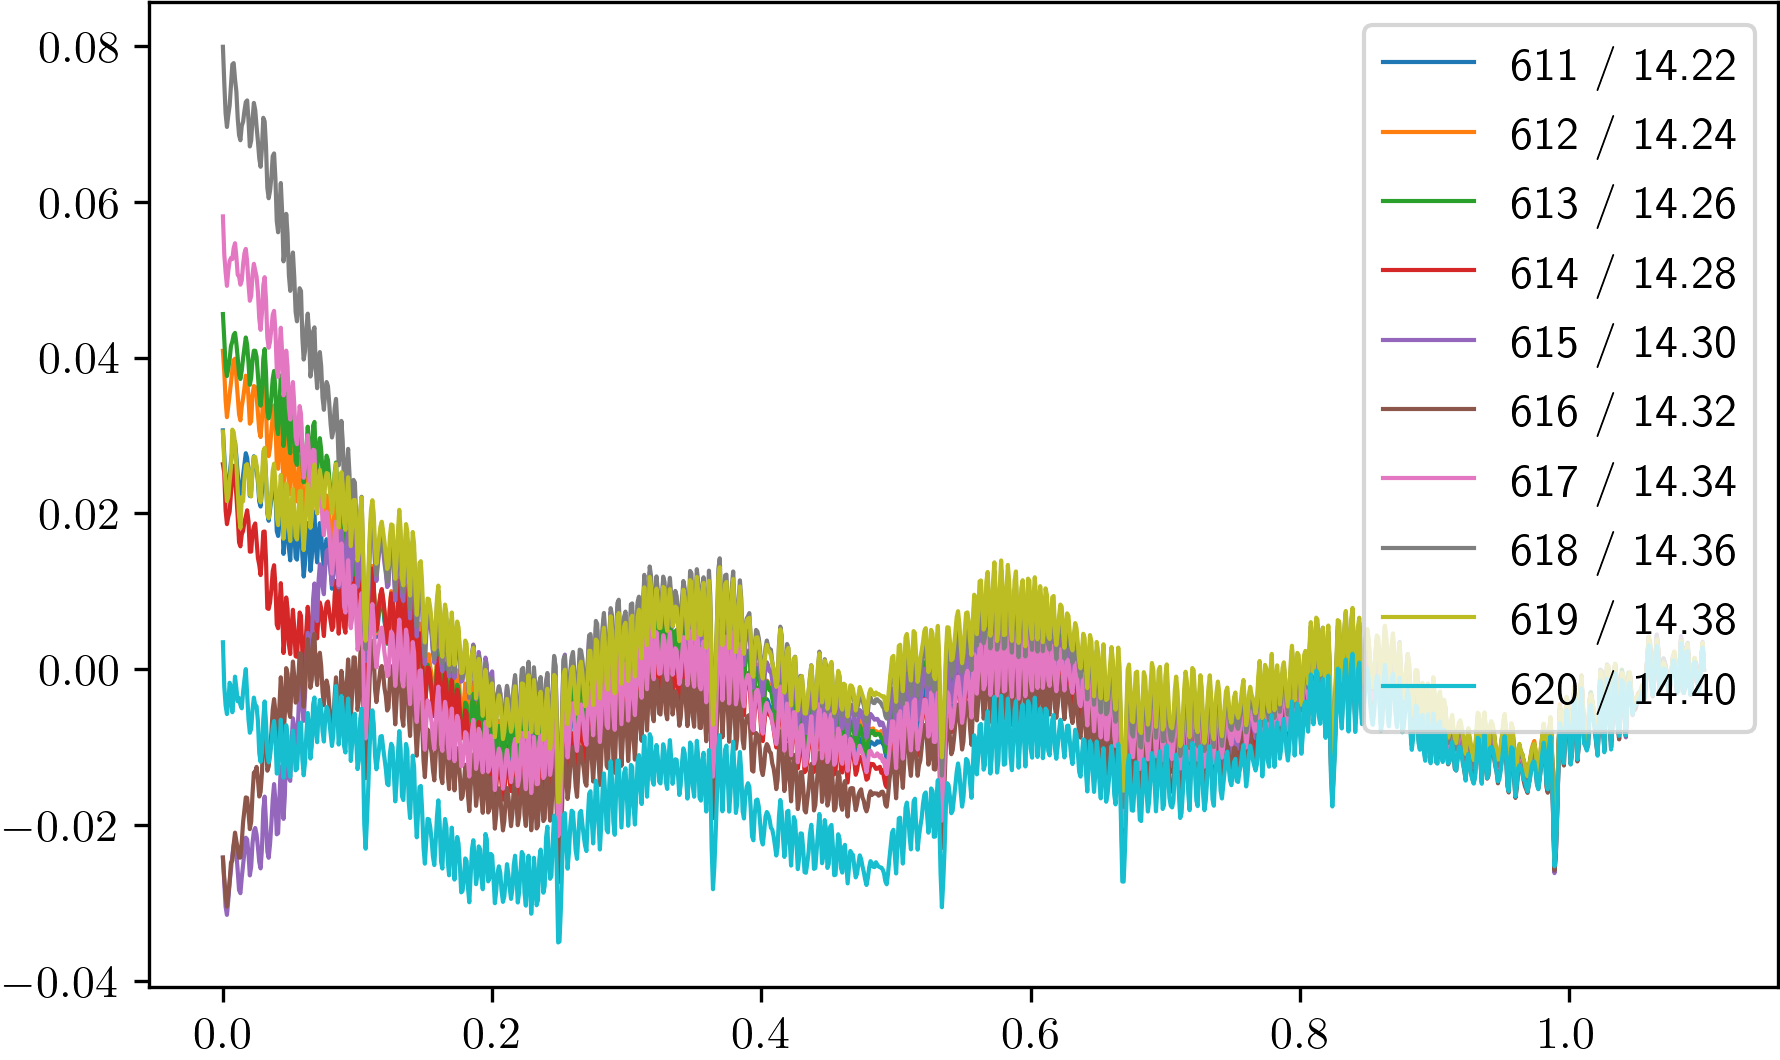

In [1621]:
start=start+10
plt.close()
for i in np.linspace(start+1,start+10,10):
    i=int(i)
    print(i,freq[int(i)])
    plt.plot(H,20*np.log10(np.abs(dn['S21'][int(i),:])),label='%i / %3.2f'%(i,freq[i]))
plt.legend(loc='upper right')

### Faltung / Correlation

(1901, 1101) (1901, 1101)
(-4.282711984851895, 10.992806881179101)


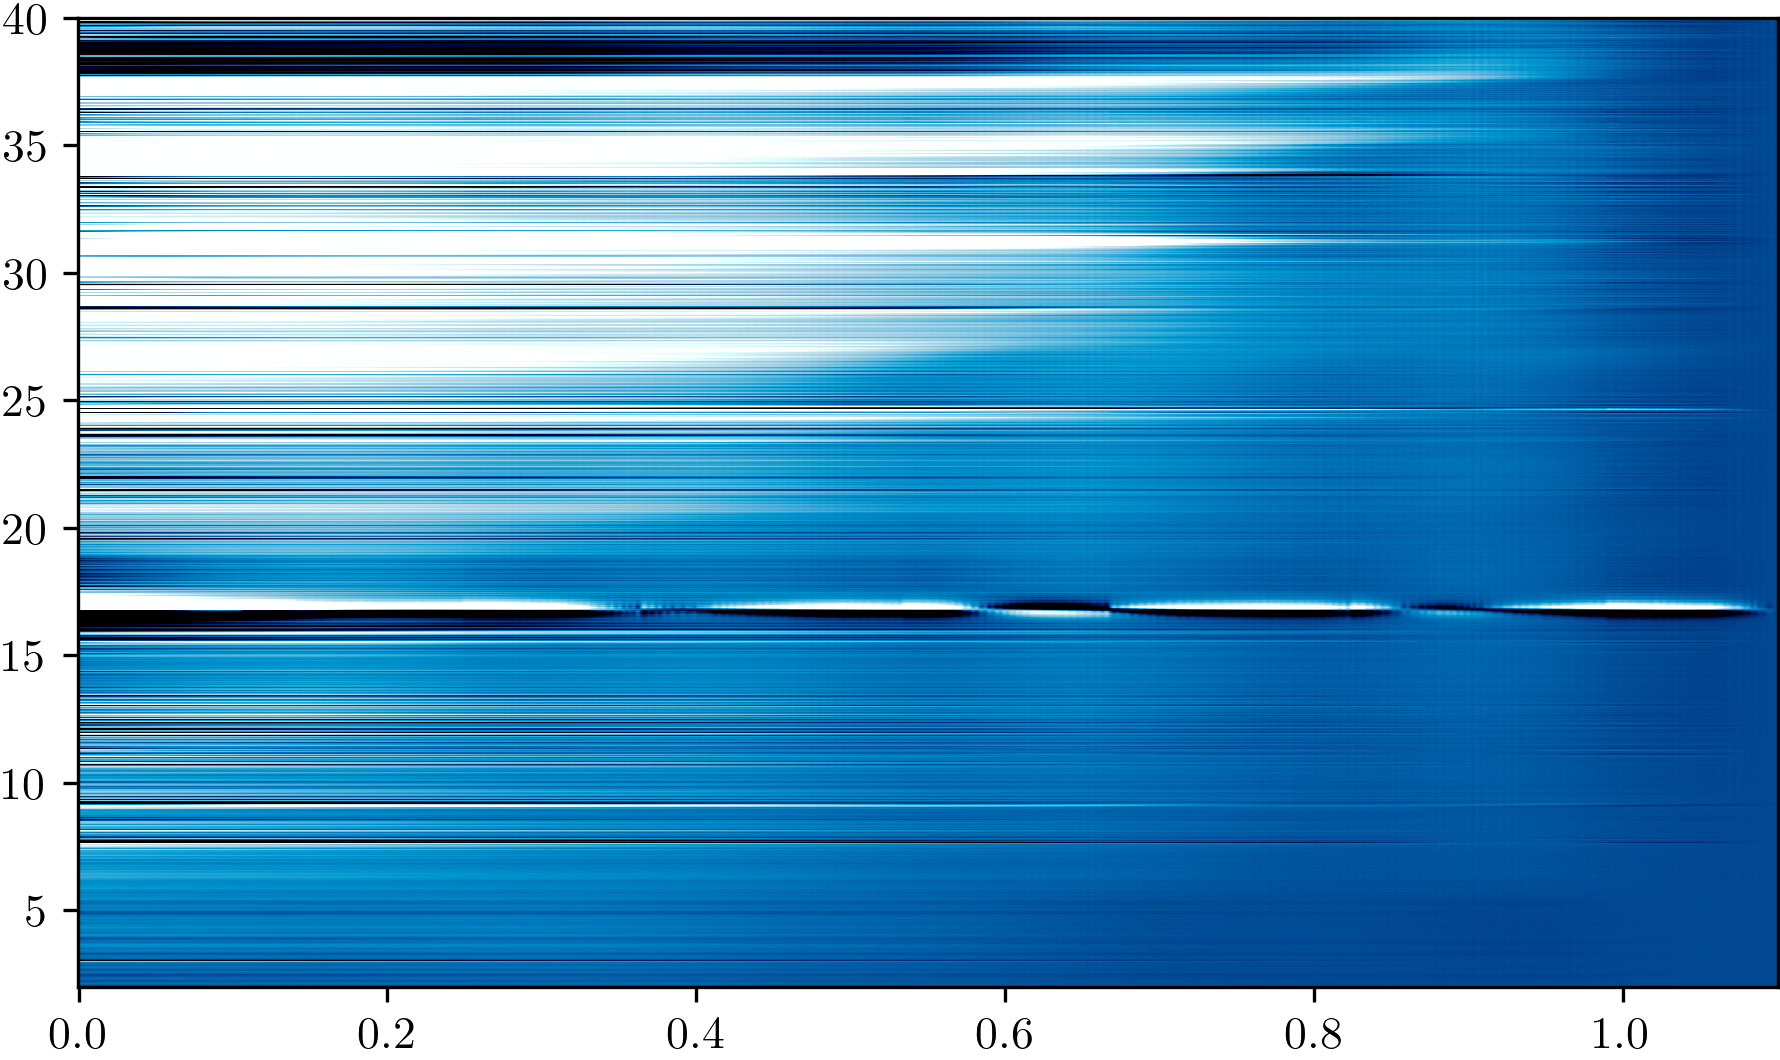

In [1622]:
T21=20*np.log10(np.abs(dn['S21']))

TT,ones=np.meshgrid(T,np.zeros(np.shape(T21)[0]))
bild=np.zeros(np.shape(T21))
print(np.shape(T21),np.shape(TT))
#bild=np.correlate(T21,TT, 'same')
Tnorm=T-np.min(T)
Tnorm=Tnorm/np.max(Tnorm)
#T21=T21-np.min(T21)
#T21=T21/np.max(T21)
for i,eff in enumerate(freq):
    bild[i,:]=np.convolve(T21[i,:],-Tnorm+1,'full')[:len(bild[i,:])]

norm=bild[:,-1]


ones,nnorm=np.meshgrid(np.zeros(np.shape(T21)[1]),norm)
    
img=bild-nnorm
contrast=1
clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))
print(clim)
plt.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())



### Median Behandlung

((1101,), (1101,))

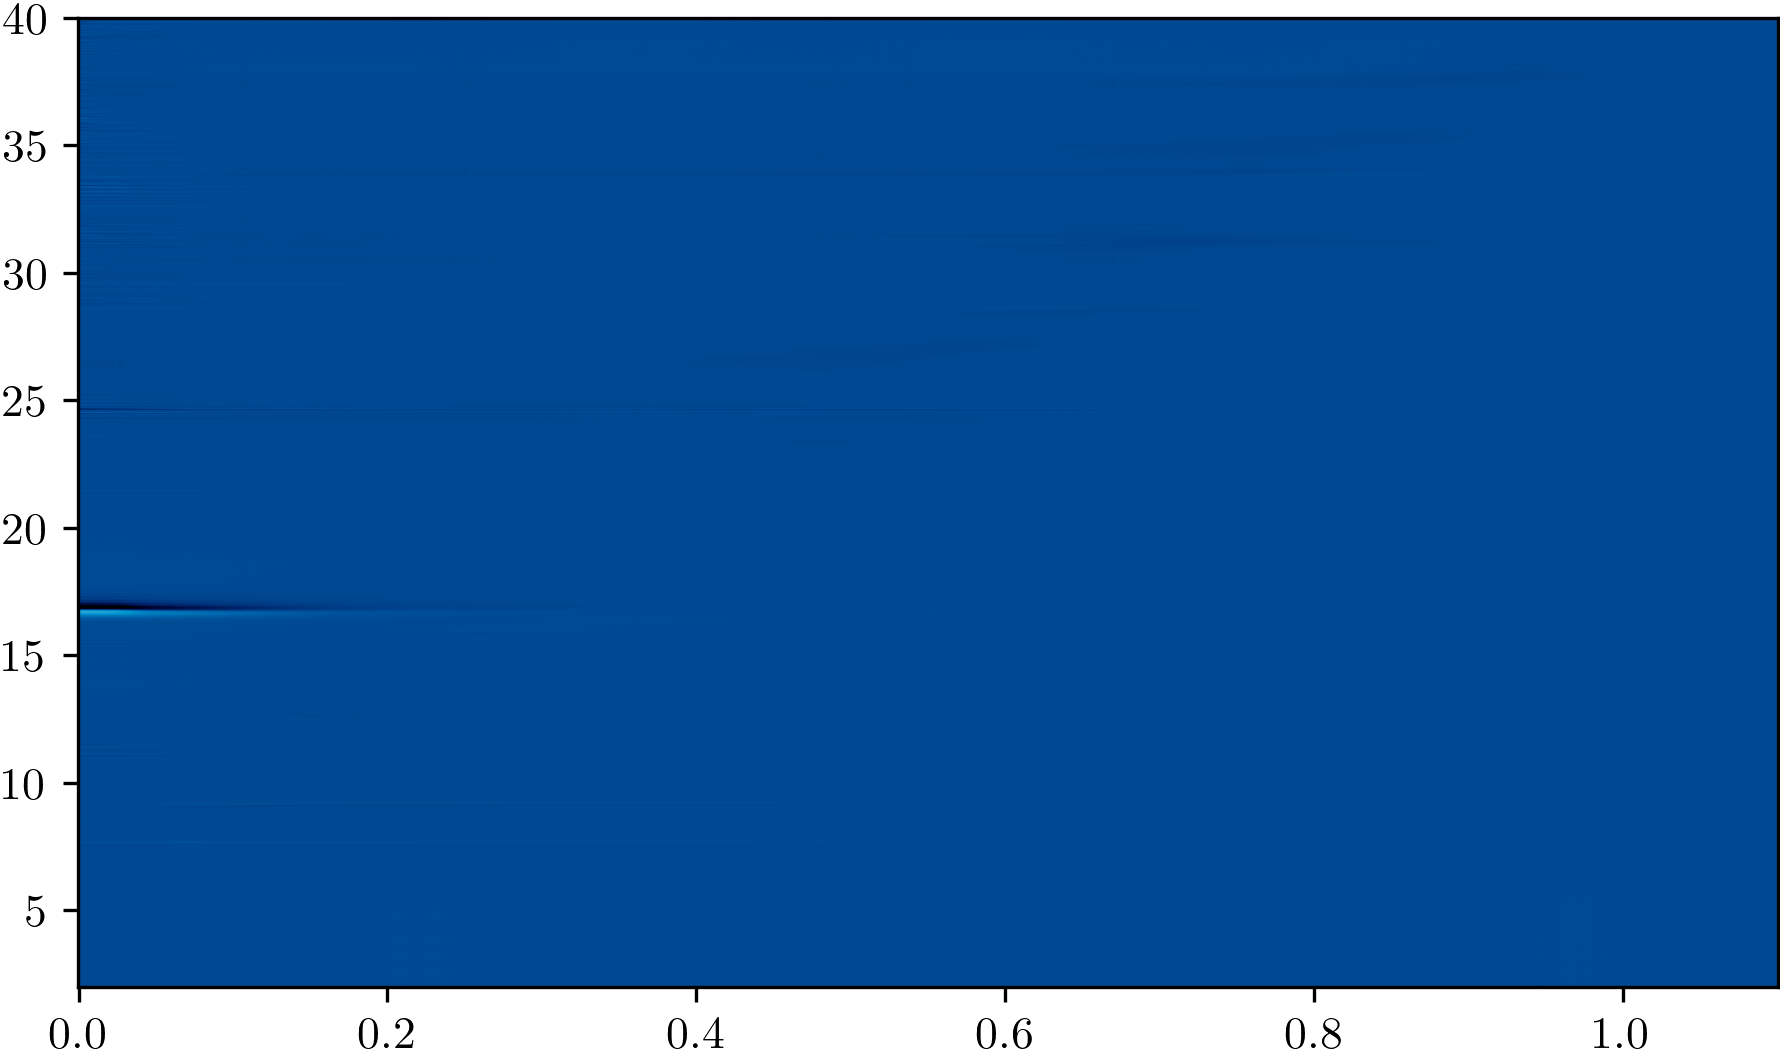

In [1623]:
T21=20*np.log10(np.abs(dn['S21']))
medianT21=np.median(T21,axis=0)
nnorm,ones=np.meshgrid(medianT21,np.zeros(np.shape(T21)[0]))

plt.imshow(T21-nnorm, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
np.shape(T),np.shape(medianT)